<div class='alert alert-block alert-success'>
    
# Exercises (Exploration (Regression))

<hr style='border:2px solid green'>

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict `property values` using some of their available features; who knows, you might even do some **feature engineering** to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
import os
#standard ds imports
import pandas as pd
import numpy as np

#viualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats imports
from scipy.stats import pearsonr, spearmanr, ttest_ind

#custom modules
import wrangle as w
import explore as e
#remove pink warning box
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = w.wrangle_zillow()

In [3]:
df.head(3)

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built
4,2.0,4,3633,LA,6941.39,296425,2005
6,4.0,3,1620,LA,10244.94,847770,2011
7,2.0,3,2077,LA,7924.68,646760,1926


In [4]:
train, validate, test = w.splitting_data(df)

train ----> (1284141, 7) 60%
validate -> (428047, 7)  20%
test -----> (428047, 7)  20%


In [5]:
df.dtypes

bathrooms     float64
bedrooms        int64
area            int64
county         object
tax_amount    float64
tax_value       int64
year_built      int64
dtype: object

In [6]:
for col in df.columns:
    unique_value_counts = df[col].value_counts().nunique()
    print(f"Number of unique value counts in '{col}': {unique_value_counts}")

Number of unique value counts in 'bathrooms': 33
Number of unique value counts in 'bedrooms': 19
Number of unique value counts in 'area': 1389
Number of unique value counts in 'county': 3
Number of unique value counts in 'tax_amount': 34
Number of unique value counts in 'tax_value': 405
Number of unique value counts in 'year_built': 141


In [7]:
# that's a BIG range of years...
df.year_built.value_counts().sort_index().head(36)
# Only about ~2,534 in the 1800s so let's "drop" them when creating a decade column for year_built

year_built
1801      3
1807      1
1812      2
1823      1
1833      1
1840      1
1855      1
1862      1
1865      2
1870      3
1874      1
1875      9
1876      2
1877      1
1878      2
1879      1
1880     39
1881      4
1882      6
1883      8
1884     13
1885    169
1886     33
1887     77
1888     86
1889     30
1890    537
1891     31
1892     65
1893     90
1894    103
1895    563
1896    127
1897    128
1898    255
1899    138
Name: count, dtype: int64

<div class="alert alert-block alert-info"> 

* I created sample functions for df_sample to make a smaller version of Zillow
* 1,800 rows before dropping nulls compared to over 2,000,000

In [8]:
df_sample = w.wrangle_zillow_sample()

In [9]:
df_sample.head(3)

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built
4,2.0,4,3633,LA,6941.39,296425,2005
6,4.0,3,1620,LA,10244.94,847770,2011
7,2.0,3,2077,LA,7924.68,646760,1926


In [10]:
df_sample.shape

(1775, 7)

In [11]:
train_sample, validate_sample, test_sample = w.splitting_data(df_sample)

train ----> (1065, 7) 60%
validate -> (355, 7)  20%
test -----> (355, 7)  20%


In [12]:
train_sample.head(3)

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built
1571,2.0,4,1408,LA,2043.67,160811,1982
338,2.0,3,1374,Ventura,3337.30,274181,1993
640,1.0,2,855,Ventura,4144.26,352000,1978


#### Target variable?
* `tax_value`
* continuous int64 feature AKA regression problem

#### Other variables of value?
* `Continuous features` - area, tax_amount, tax_value
* `Categorical features` - county, bedrooms, bathrooms, year_built
    * Yes their unique values are high but with 2 million rows, it's understandable.
    * year_built only has so many unique values because of the few from the 1800s, let's make 1800s into a category and place the rest in decade categories!

<hr style='border:2px solid green'>

## Explore

<div class="alert alert-block alert-info"> 
<b>REMEBER:</b> 

- Do <b><u>not</u></b> use stratify on a continuous target  
- We split our data before we explore (generally) 
- We did above!
</div>

## 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

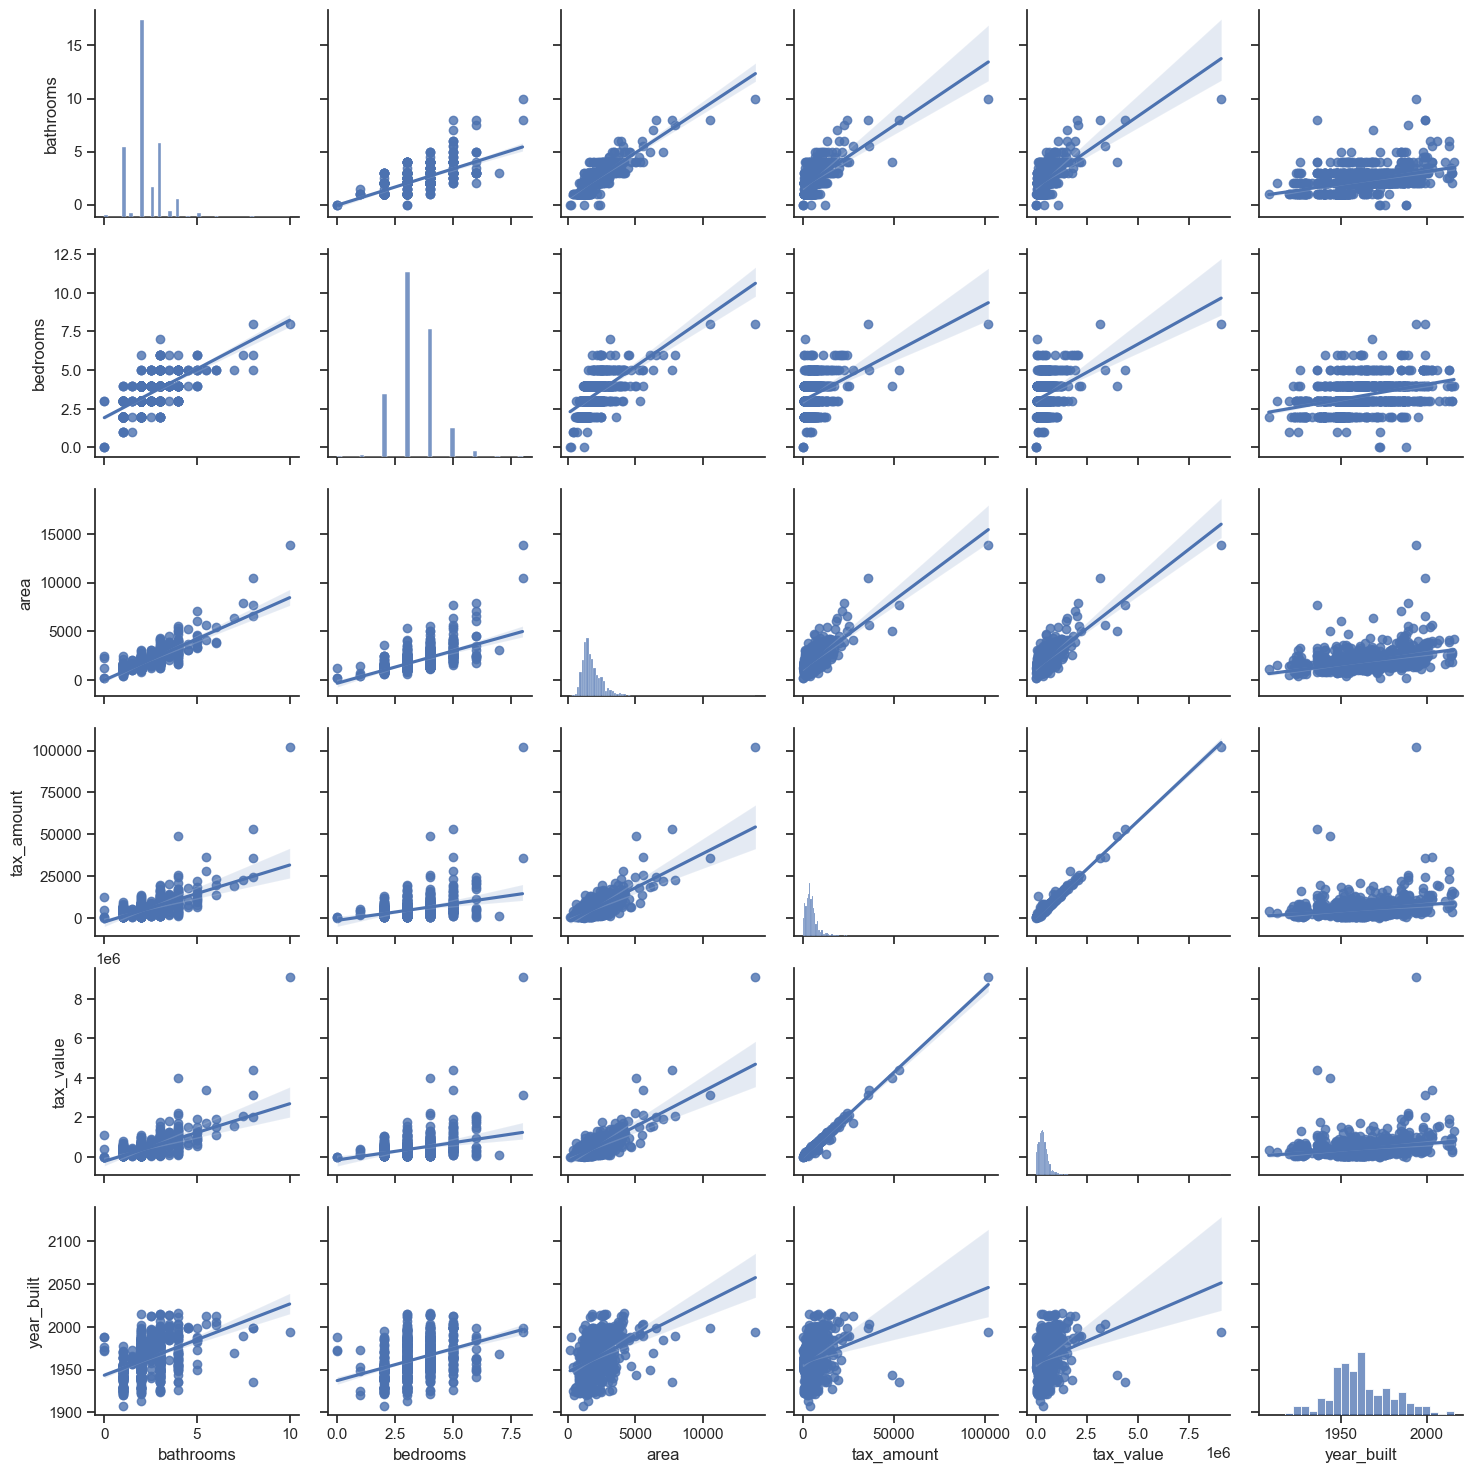

In [13]:
e.plot_variable_pairs(train_sample)

## 2. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

<div class="alert alert-block alert-info"> 

### already in my py file

## 3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## 4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [14]:
# create a new column with the years being binned by decade
train_sample['decade_built'] = pd.cut(train_sample['year_built'], bins=range(1900, 2021, 10), labels=range(1900, 2020, 10))

cat_cols = ['decade_built', 'county', 'bathrooms', 'bedrooms']
cont_cols = ['area', 'tax_value', 'tax_amount']

In [15]:
train_sample.head(3)

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built,decade_built
1571,2.0,4,1408,LA,2043.67,160811,1982,1980
338,2.0,3,1374,Ventura,3337.30,274181,1993,1990
640,1.0,2,855,Ventura,4144.26,352000,1978,1970


In [16]:
train_sample.shape #was initially bigger but takes too long to process so made it smaller!
# MUCH faster now!

(1065, 8)

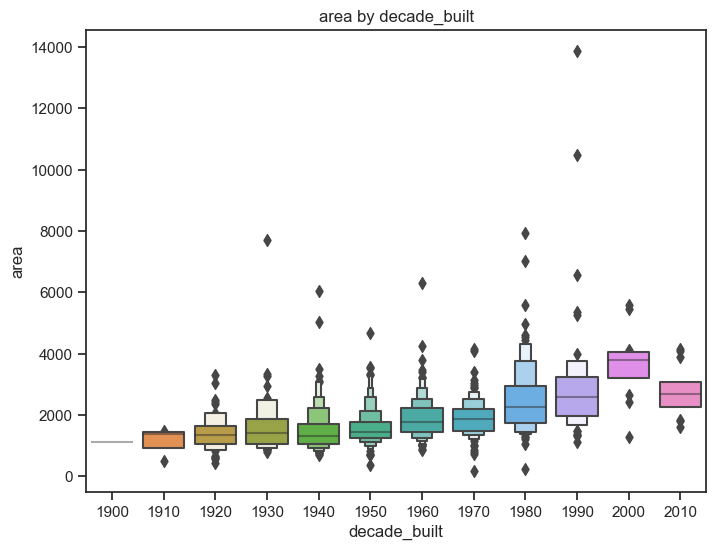

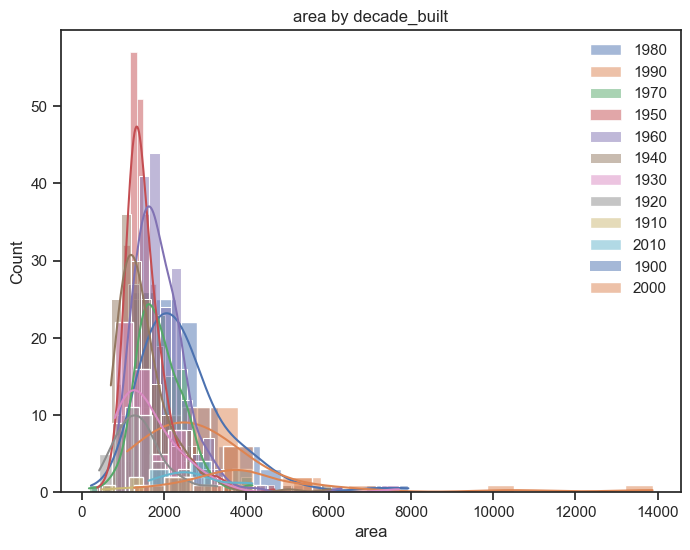

<Figure size 800x600 with 0 Axes>

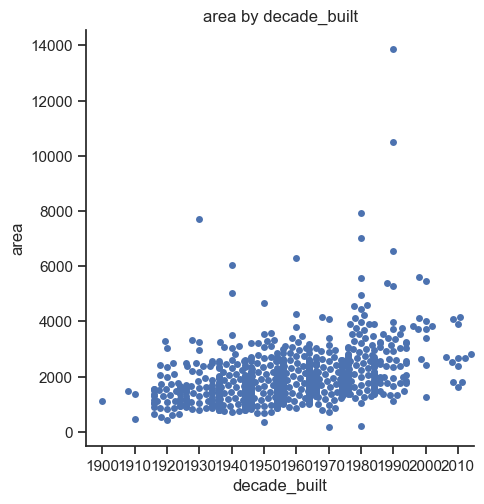

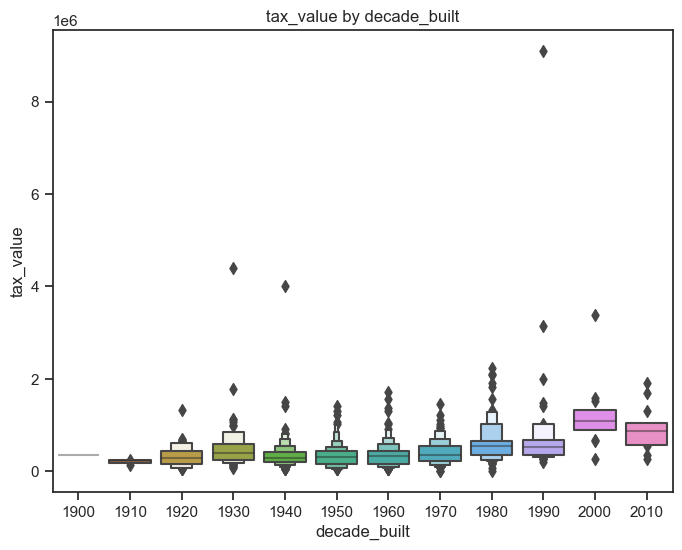

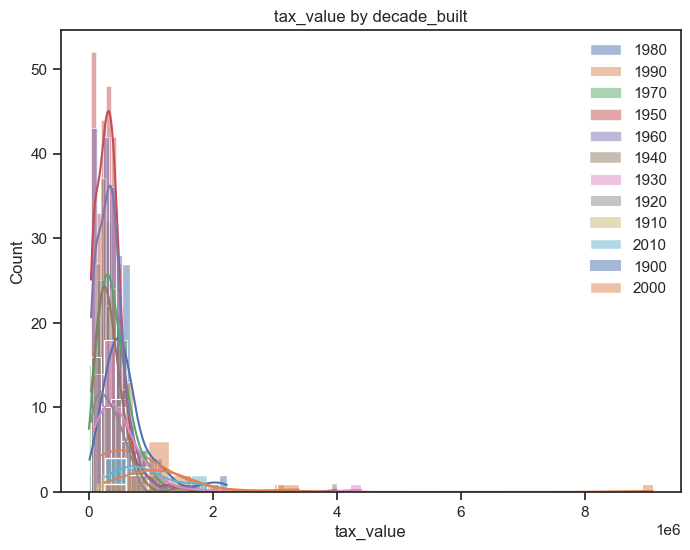

<Figure size 800x600 with 0 Axes>

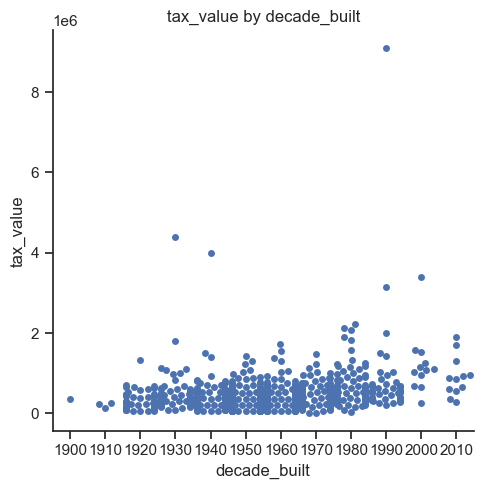

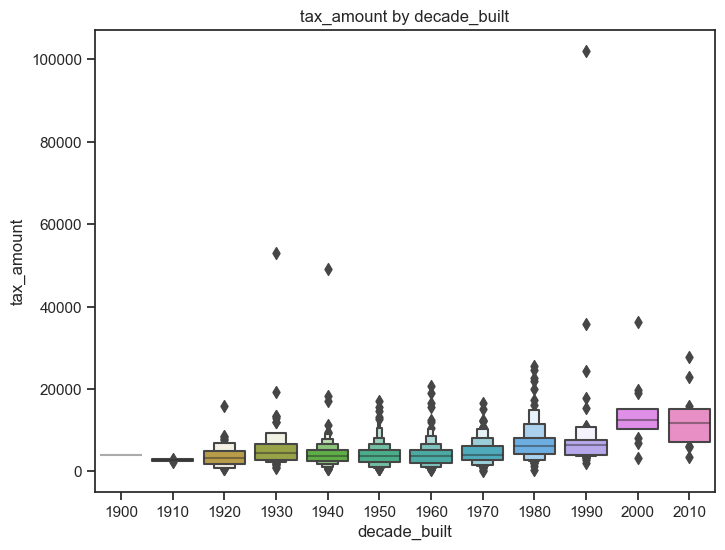

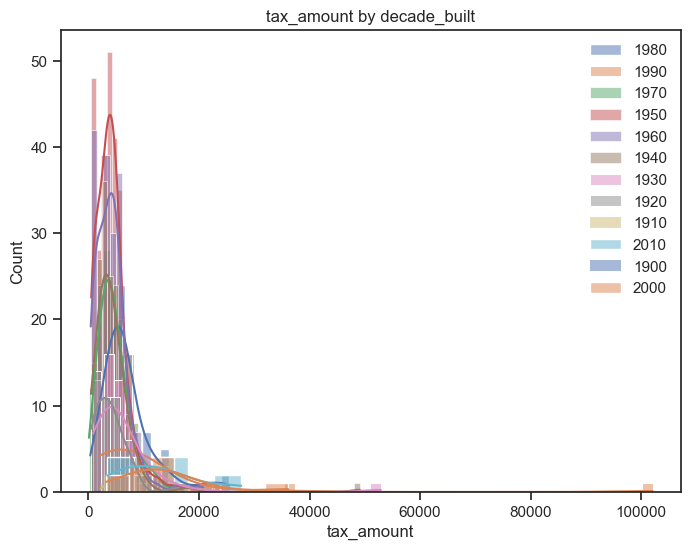

<Figure size 800x600 with 0 Axes>

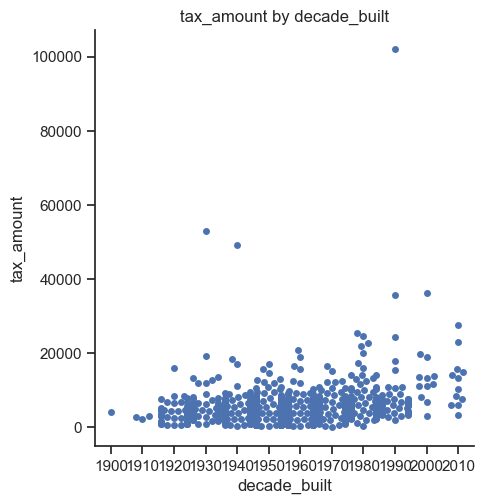

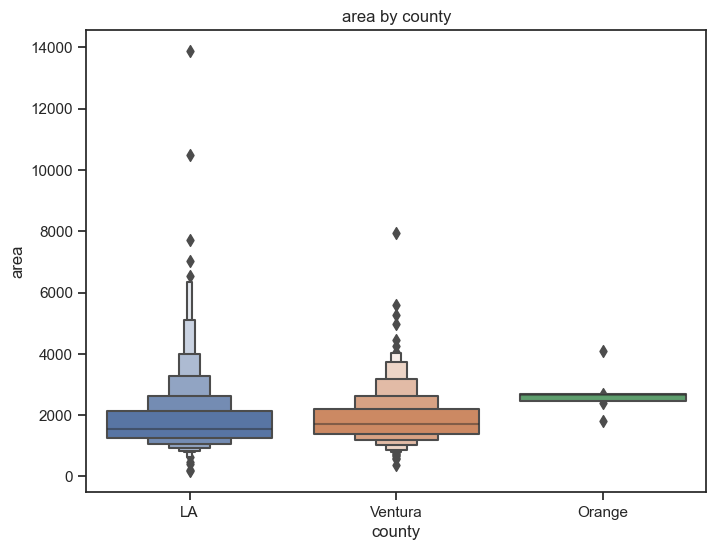

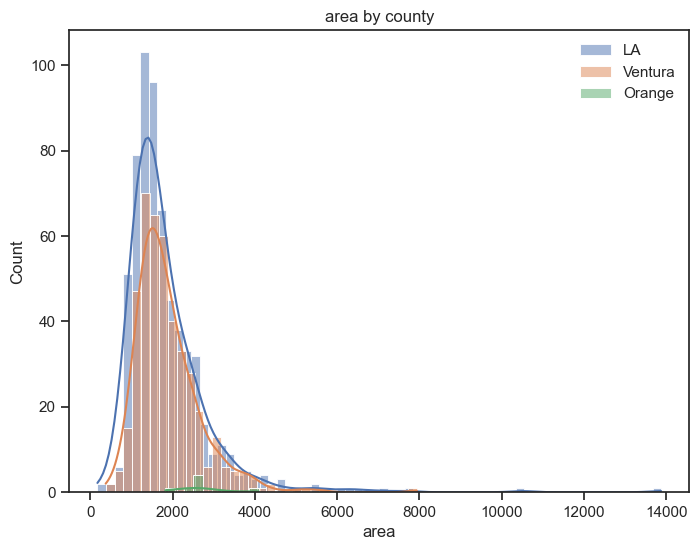

<Figure size 800x600 with 0 Axes>

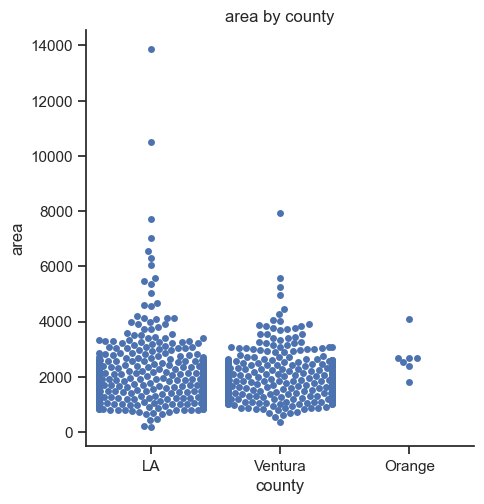

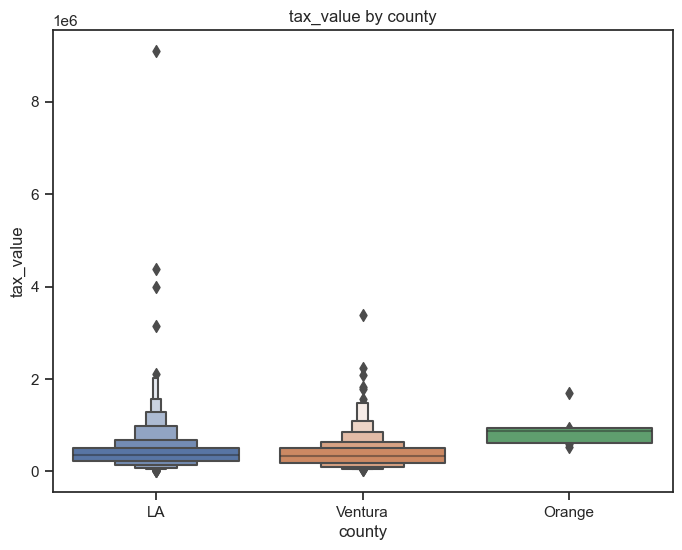

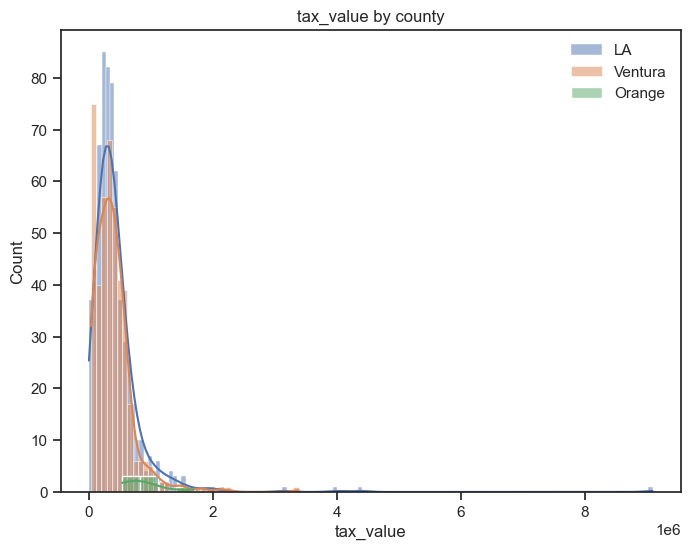

<Figure size 800x600 with 0 Axes>

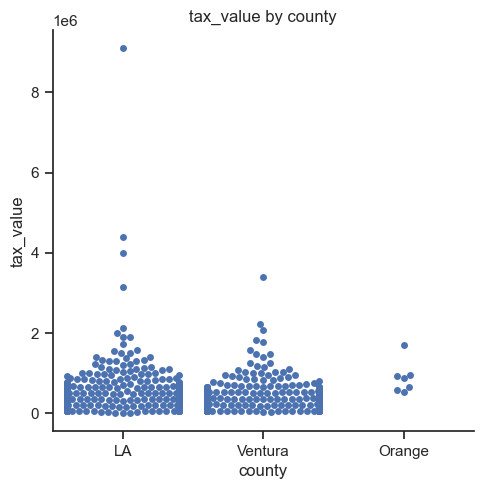

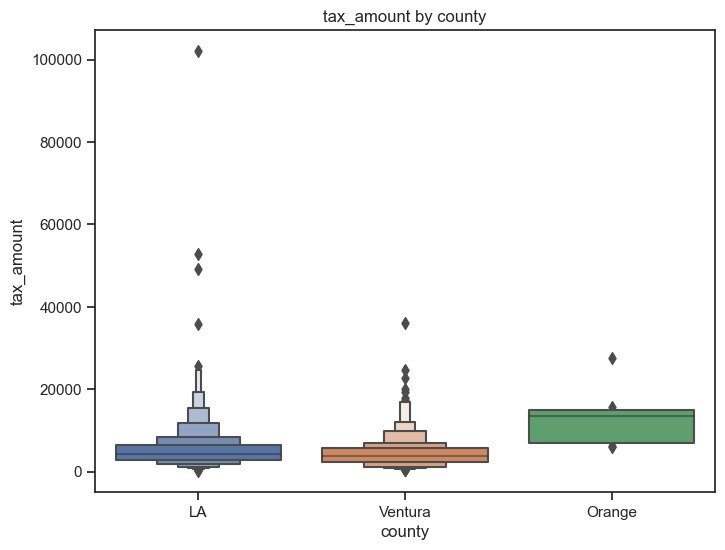

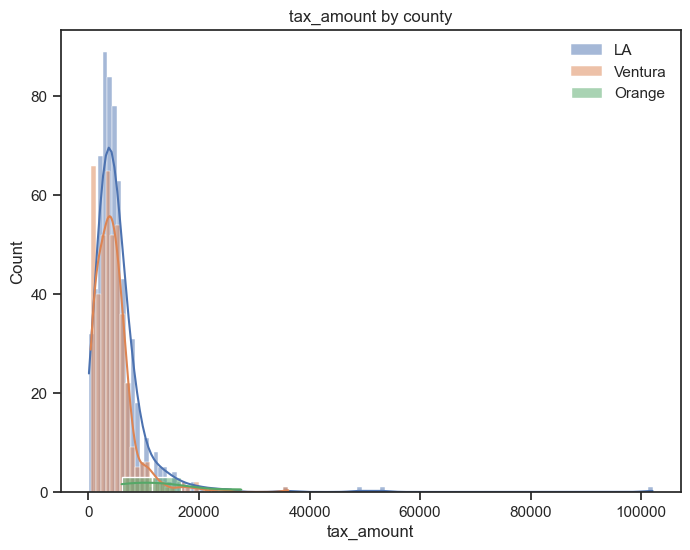

<Figure size 800x600 with 0 Axes>

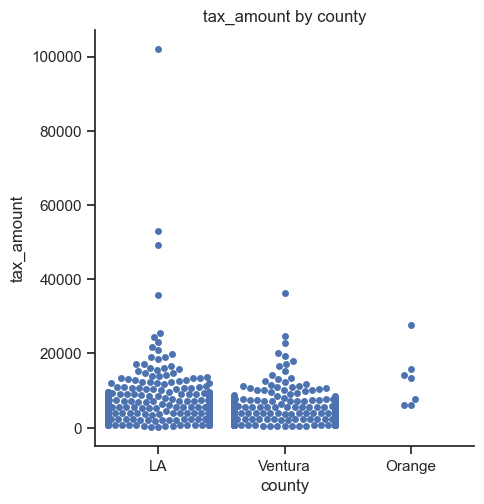

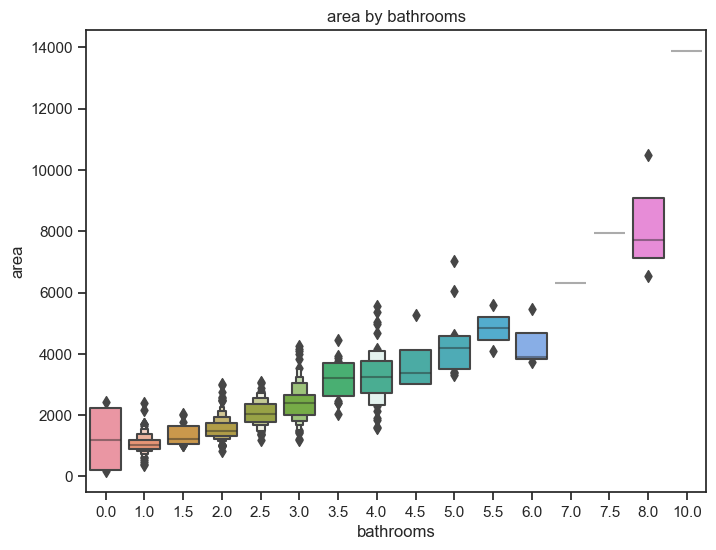

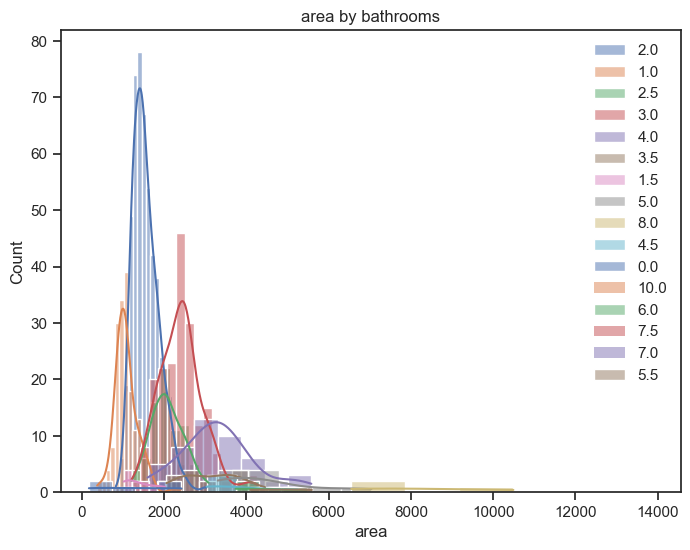

<Figure size 800x600 with 0 Axes>

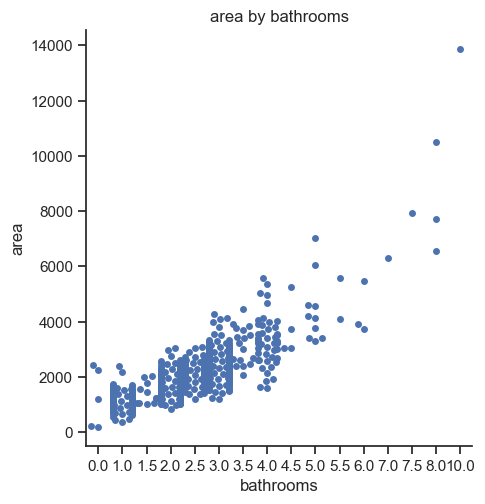

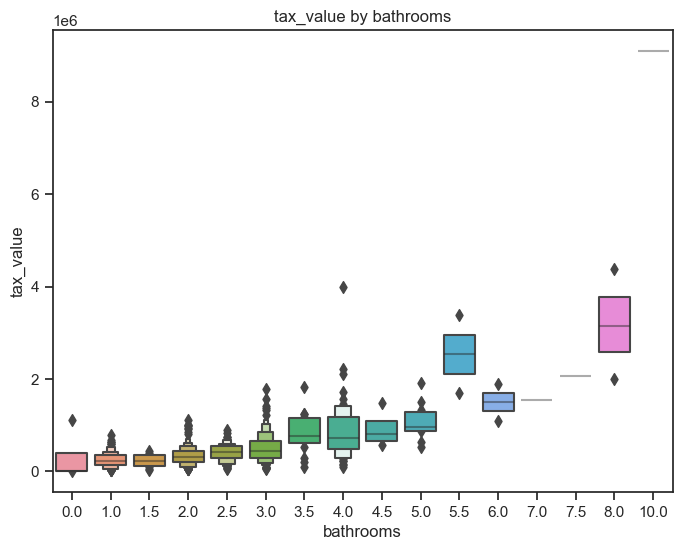

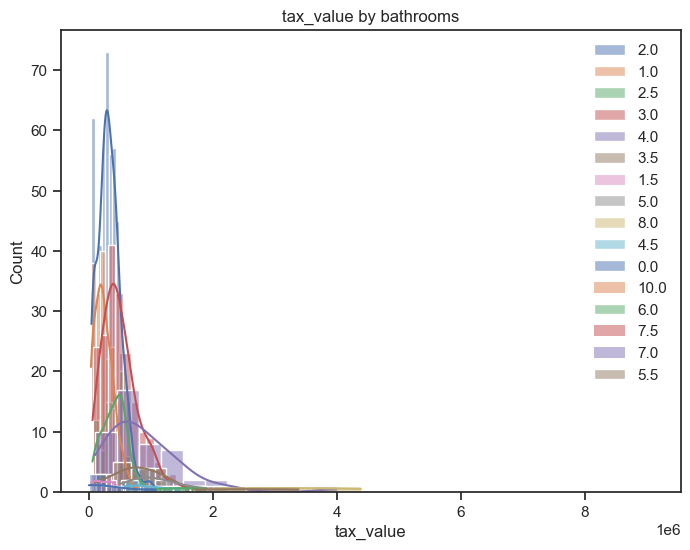

<Figure size 800x600 with 0 Axes>

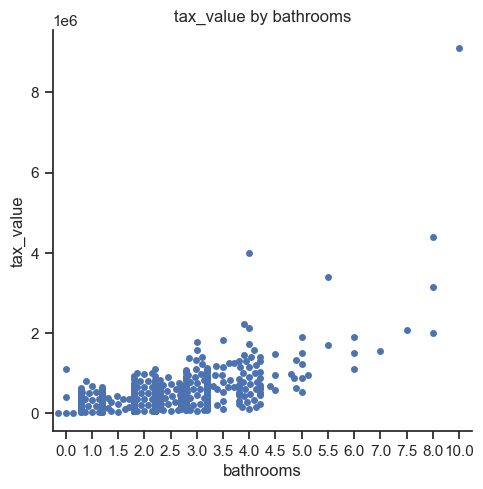

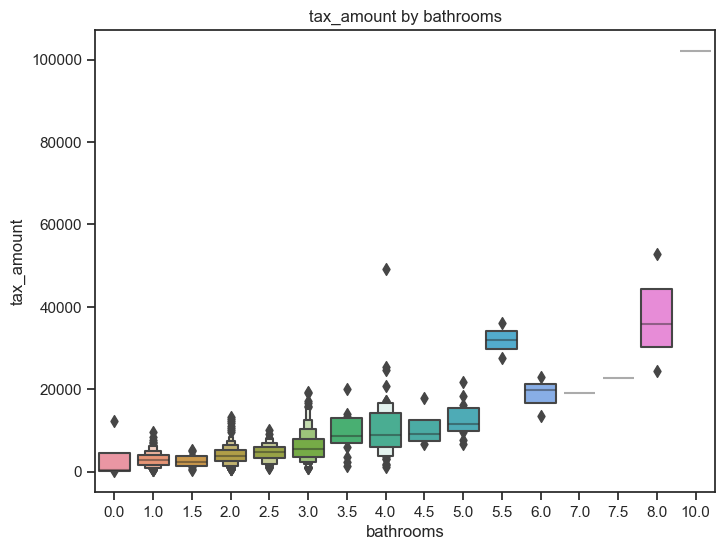

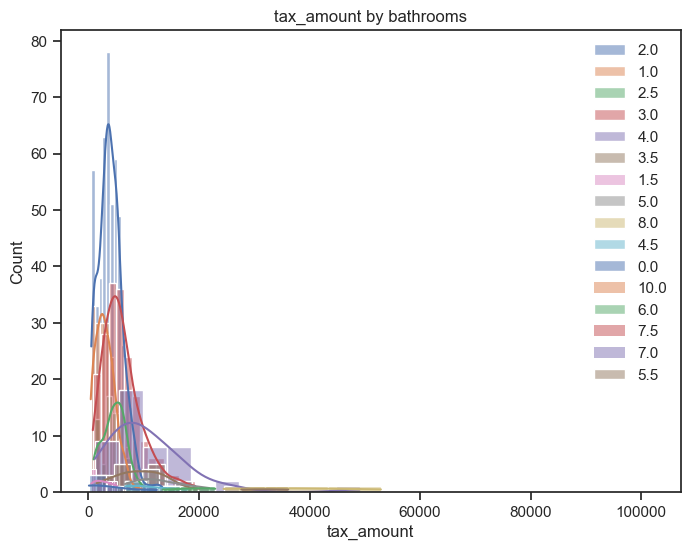

<Figure size 800x600 with 0 Axes>

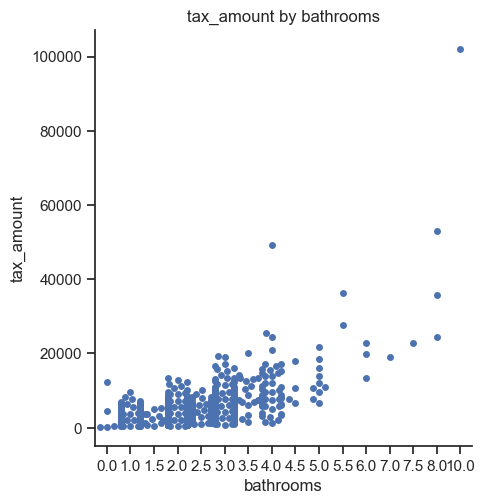

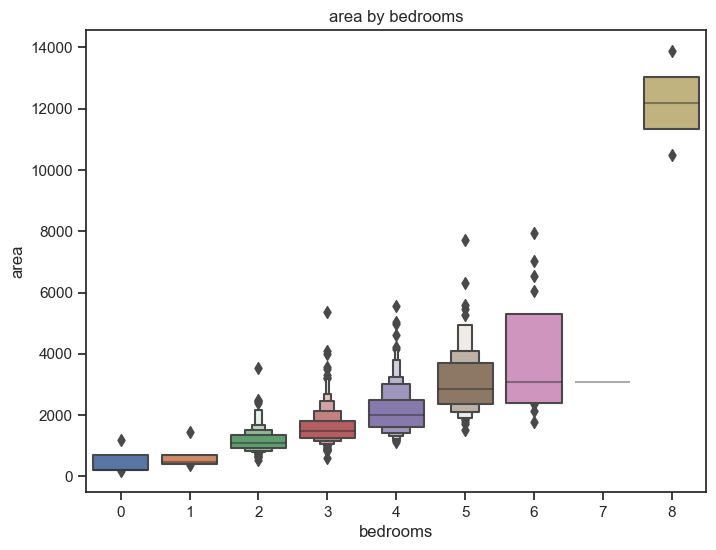

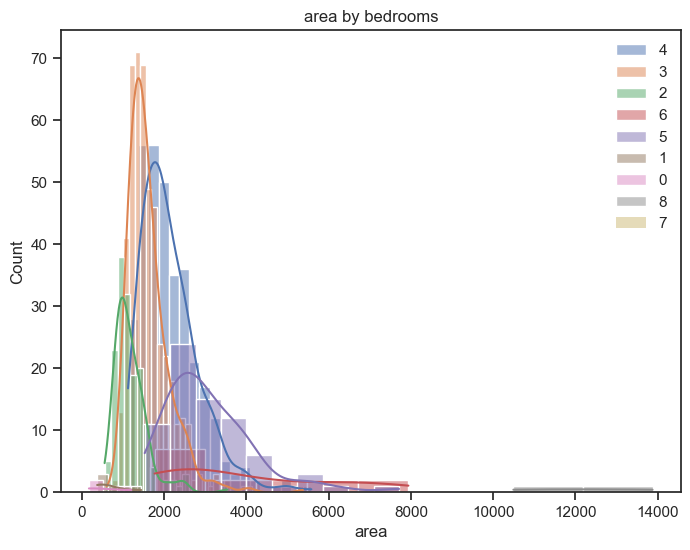

<Figure size 800x600 with 0 Axes>

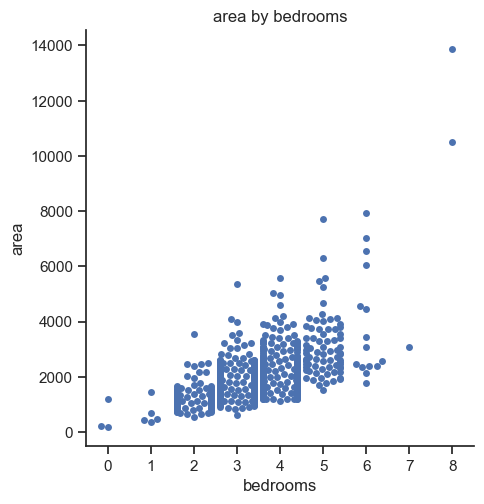

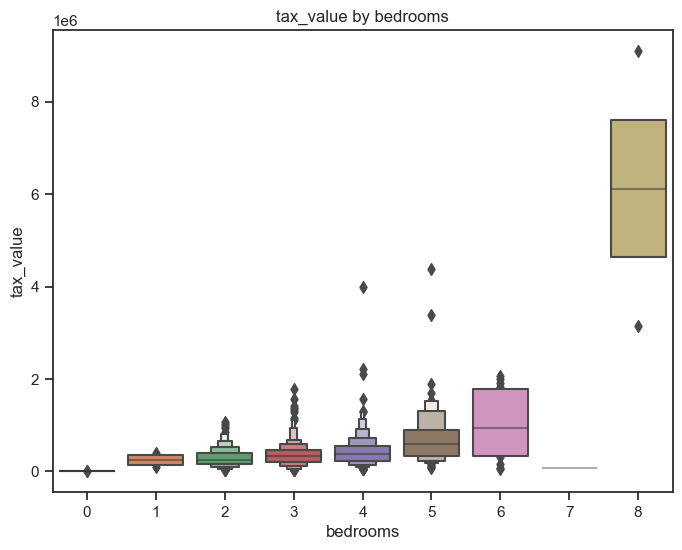

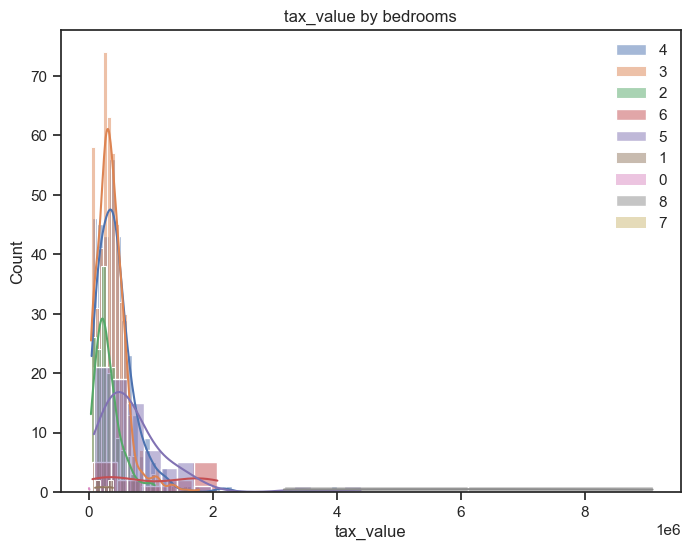

<Figure size 800x600 with 0 Axes>

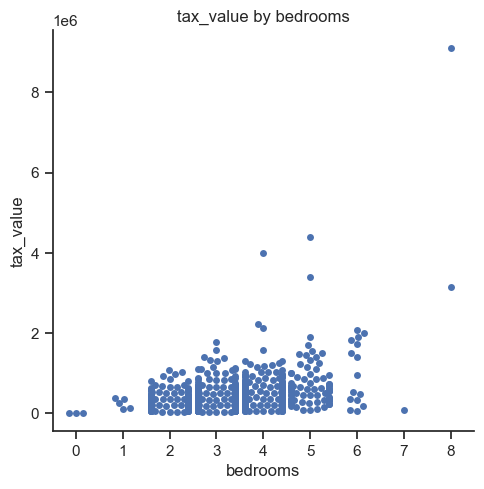

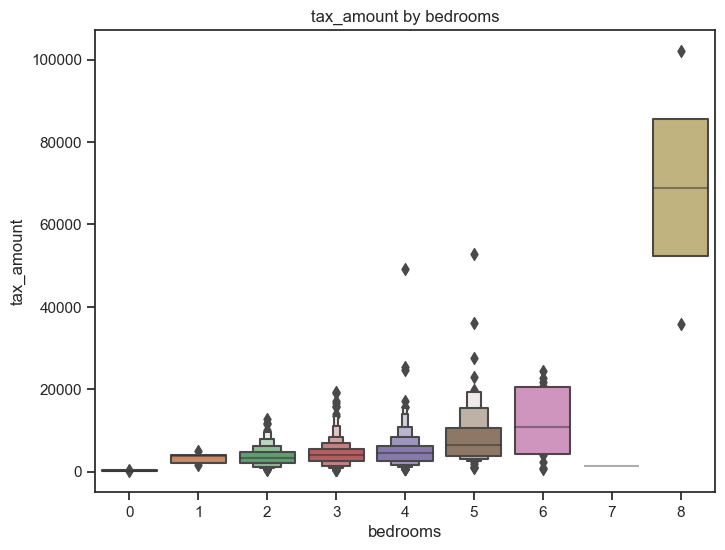

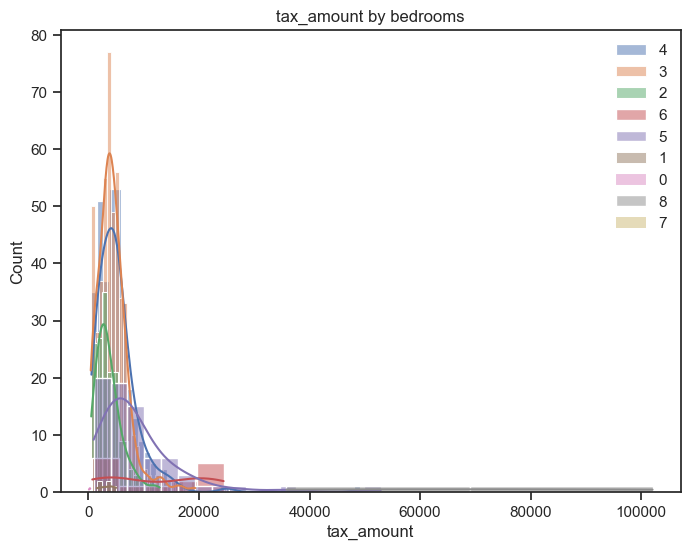

<Figure size 800x600 with 0 Axes>

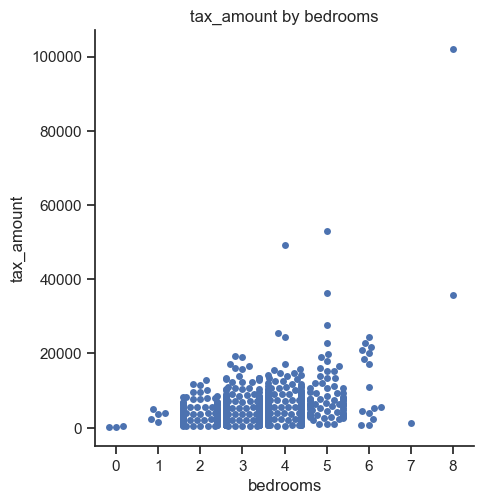

In [17]:
e.plot_categorical_and_continuous_vars(train_sample, cat_cols, cont_cols)

> Observations: Continuous Variable
> * tax_value and tax_amount look to be nar perfectly correleated. This makes sense as tax_amount is derived from the tax_value and any variation could be explained by home owner tax exemptions.
> * **area (sqfeet) looks to have a positive correlation to tax_value. Will proceed with hypothesis testing to this relationship.**

> Observations: Discreet
> * bedrooms - looks to have a moderate positive linear correlation.
> * bathrooms - looks to have a moderate positive linear correlation.
> * year_built - looks to have a small positive linear correlation but unsure.
> * county - requires different stats testing. Does appear that county and tax_value have a dependent relationship

## 5. Come up with some initial hypotheses based on your goal of predicting property value.

## Hypothesis Testing

<div class='alert alert-block alert-success'>

* tax_value looks to be correlated with area, bedrooms, bathrooms, and year_built.
* tax_value and county look to have a dependent relationship

### Hypothesis

* $H_0$: There is `NO` linear correlation between area and tax_value
* $H_a$: There `IS` a linear correlation between area and tax_value

In [18]:
# confidence level
alpha = 0.05

In [19]:
r, p = spearmanr(train_sample.area, train_sample.tax_value)

In [20]:
if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a linear correlation between area and tax_value.')
else:
    print('We fail to reject the null hypothesis')
    
print(r,p)

We can reject our null hypothesis and suggest that there is a linear correlation between area and tax_value.
0.5234494966843316 5.709986326592488e-76


### Hypothesis

* $H_0$: There is `NO` linear correlation between bedrooms and tax_value
* $H_a$: There `IS` a linear correlation between bedrooms and tax_value

In [21]:
r, p = spearmanr(train_sample.bedrooms, train_sample.tax_value)

In [22]:
if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a linear correlation between bedrooms and tax_value.')
else:
    print('We fail to reject the null hypothesis')
    
print(r,p)

We can reject our null hypothesis and suggest that there is a linear correlation between bedrooms and tax_value.
0.2522750672929083 6.340151274272502e-17


## 6. Visualize all combinations of variables in some way.

## 7. Run the appropriate statistical tests where needed.

## 8. What independent variables are correlated with the dependent variable, home value?

## 9. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

## 10. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 11. Explore your dataset with any other visualizations you think will be helpful.

<div class="alert alert-block alert-info"> 

# Bonus Exercise

## 1. In a separate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.